In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Exercice 2: A-stabilité méthode d'Euler
Déterminer les conditions de A-stabilité de l'Euler avant, arrière centré.

- Euler avant: $k<2$
- Euler arrière: inconditionnellement A-stable
- Euler centré: inconditionnellement A-stable

# Exercice 3: Monoticité des méthodes d'Euler

Déterminer la condition de monotonicité pour l’Euler avant, arrière et centré.

- Euler avant: $k<1$
- Euler arrière: inconditionnellement monotone
- Euler centré: $k<2$

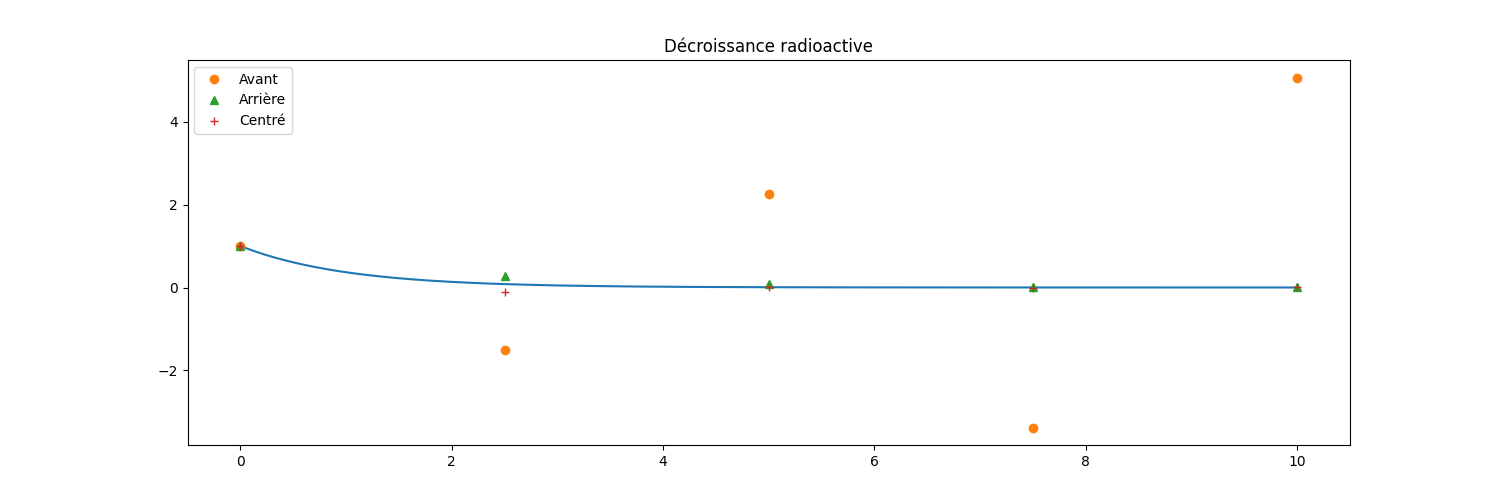

In [16]:
tmax=10
k=2.5
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)
u_EUav=np.zeros(N)
u_EUar=np.zeros(N)
u_EUcen=np.zeros(N)

#CI
u_EUav[0]=1
u_EUar[0]=1
u_EUcen[0]=1

for i in range(N-1):
    u_EUav[i+1]=(1-k)*u_EUav[i]
    u_EUar[i+1]=u_EUar[i]/(1+k)
    u_EUcen[i+1]=((1-k/2)/(1+k/2))*u_EUcen[i]


fig,ax=plt.subplots(figsize=(15,5))
ax.plot(np.linspace(0,tmax,1001),np.exp(-np.linspace(0,tmax,1001)))
ax.plot(t,u_EUav,'o',label='Avant')
ax.plot(t,u_EUar,'^',label='Arrière')
ax.plot(t,u_EUcen,'+',label='Centré')
ax.legend()
ax.set_title('Décroissance radioactive')
plt.show()



# Exercice 4: Oscillateur harmonique
L'équation de l'oscillateur harmonique est:

${\large \frac{d^{2}x}{dt^{2}}=-\frac{-K}{m}x}$

avec $K$ la constante de raideur du ressort et $m$ la masse.

Cette équation peut s'écrire sous forme matriciel:

${\large \frac{d \mathbf{x}}{dt}=M\mathbf{x}}$, avec ${\large \mathbf{x}=(p,x)}$ et 
${\large M=\begin{pmatrix} 
0 & -K\\
1/m & 0\\
\end{pmatrix}
}$

**Vérifier que le schéma Euler avant crée de l’énergie ; que l’Euler arrière en détruit ; et que seul l’Euler centré est conservatif. Illustrer ces propriétés en intégrant le système.**

In [3]:

np.set_printoptions(precision=6)


def HarmOsc(K,m,t,x0,mode):
    k=t[1]-t[0]
    x=np.zeros((2,np.shape(t)[0]))
    x[:,0]=x0
    M=np.array([[0,-K],[1/m,0]])	
    if mode=='Euler avant':
        for i in range(np.shape(x)[1]-1):
            M=np.array([[0,-K],[1/m,0]])
            x[:,i+1]=(np.identity(2)+k*M).dot(x[:,i])
    elif mode=='Euler arrière':
        for i in range(np.shape(x)[1]-1):
            M=np.array([[0,-K],[1/m,0]])
            x[:,i+1]=np.linalg.solve((np.identity(2)-k*M),x[:,i])
    elif mode=='Euler centré':
        for i in range(np.shape(x)[1]-1):
            M=np.array([[0,-K],[1/m,0]])
            x[:,i+1]=np.linalg.solve((np.identity(2)-k/2*M),(np.identity(2)+k/2*M).dot(x[:,i]))
    elif mode=='Leapfrog':
        x[:,1]=x[:,0]
        for i in range (1,np.shape(x)[1]-1):
            x[:,i+1]=x[:,i-1]+2*k*M.dot(x[:,i])
    elif mode=='Heun':
        for i in range(np.shape(x)[1]-1):
            xx=x[:,i]+k*M.dot(x[:,i])
            x[:,i+1]=x[:,i]+(k/2)*(M.dot(x[:,i])+M.dot(xx))
    elif mode=='RK4':
        for i in range(np.shape(x)[1]-1):
            k1=k*M.dot(x[:,i])
            k2=k*M.dot(x[:,i]+k1/2)
            k3=k*M.dot(x[:,i]+k2/2)
            k4=k*M.dot(x[:,i]+k3)
            x[:,i+1]=x[:,i]+(k1+2*k2+2*k3+k4)/6
    elif mode=='Verlet':
        for i in range(np.shape(x)[1]-1):
            pp=x[0,i]-k*K*x[1,i]
            x[1,i+1]=x[1,i]+(k/2)*(x[0,i]/m+pp/m)
            x[0,i+1]=x[0,i]-(k/2)*(x[1,i]+x[1,i+1])
    elif mode=='Stormer_Verlet':
        for i in range(np.shape(x)[1]-1):
            pp=x[0,i]-(k/2)*k*x[1,i]
            x[1,i+1]=x[1,i]+(k)*(pp/m)
            x[0,i+1]=pp-(k/2)*(x[1,i+1])
    else:
        print('Invalid integration method')
    return(x)

def Energie_calc(x,k,m):
    return((x[0,:]*x[0,:])/(2*m)+k*(x[1,:]*x[1,:])/2)

In [4]:
#paramètres du problème
K=1.
m=1.0
#paramètre de l'intégration numérique
k=0.1
tmax=50
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)
#Conditions initiales
x0=[0,1]
#Solution analytique
omega=np.sqrt(K/m)
xsol=np.zeros((2,N))
xsol[1,:]=x0[1]*np.cos(omega*t)+x0[0]/(m*omega)*np.sin(omega*t)
xsol[0,:]=(-x0[1]*omega*np.sin(omega*t)+x0[0]/(m*omega)*omega*np.cos(omega*t))*m

x_EUav=HarmOsc(K,m,t,x0,'Euler avant')
x_EUar=HarmOsc(K,m,t,x0,'Euler arrière')
x_EUcen=HarmOsc(K,m,t,x0,'Euler centré')


E_EUcen=Energie_calc(x_EUcen,K,m)
E_EUar=Energie_calc(x_EUar,K,m)
E_EUav=Energie_calc(x_EUav,K,m)
Esol=Energie_calc(xsol,K,m)

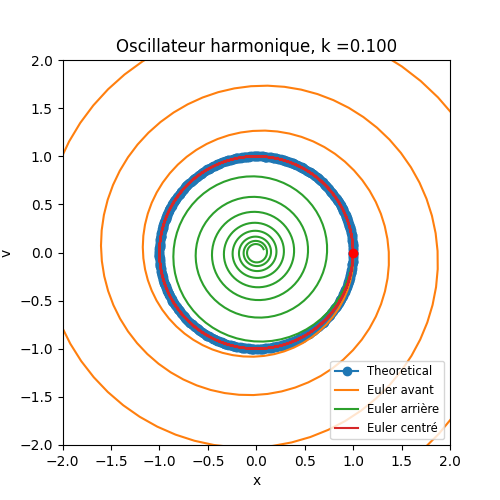

In [5]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(xsol[1,:],xsol[0,:]/m,label='Theoretical',marker='o')
ax.plot(x_EUav[1,:],x_EUav[0,:]/m,label='Euler avant')
ax.plot(x_EUar[1,:],x_EUar[0,:]/m,label='Euler arrière')
ax.plot(x_EUcen[1,:],x_EUcen[0,:]/m,label='Euler centré')
ax.plot(x0[1],x0[0]/m,'ro')
ax.legend(loc='best',fontsize='small')
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_title('Oscillateur harmonique, k =%.3f'%(k))
ax.set_xlim((-2,2))
ax.set_ylim((-2,2))
plt.show()


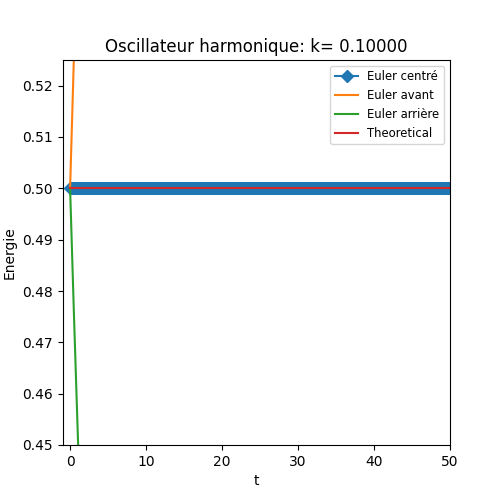

In [6]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(t,E_EUcen,label='Euler centré',marker='D')
ax.plot(t,E_EUav,label='Euler avant')
ax.plot(t,E_EUar,label='Euler arrière')
ax.plot(t,Esol,label='Theoretical')
plt.ylim((0.45,0.525))
plt.xlim((-1,50))
plt.legend(loc='best',fontsize='small')
plt.xlabel('t')
plt.ylabel('Energie')
plt.title('Oscillateur harmonique: k= %.5f'%(k))
plt.show()

# Exercice 6: Leap-frog

On a montré que le schéma leap-frog est inconditionnellement instable pour la décroissance radioactive

In [7]:
tmax=10
k=0.1
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)
u_LP=np.zeros(N)

#CI
u_LP[0]=1
u_LP[1]=(1-k)*u_LP[0]

for i in range(1,N-1):
    u_LP[i+1]=u_LP[i-1]-2*k*u_LP[i]

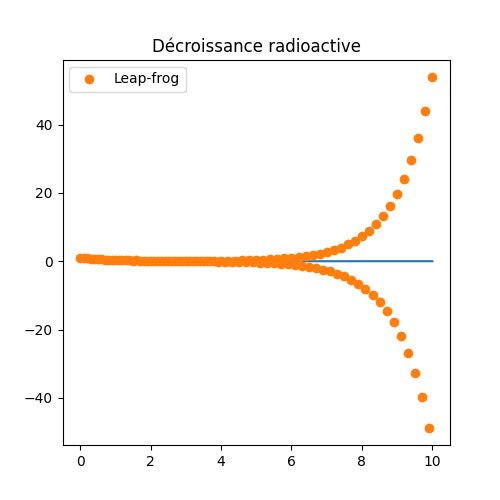

In [8]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.linspace(0,tmax,1001),np.exp(-np.linspace(0,tmax,1001)))
ax.plot(t,u_LP,'o',label='Leap-frog')
ax.legend()
ax.set_title('Décroissance radioactive')
plt.show()

# Exercice 7: Equation logistique

L'équation logistique:

${\large 
\begin{equation*}
\frac{dx}{dt}=\lambda x(1-x), \quad x_{0}=\alpha
\end{equation*}}
$

a pour solution exacte:

${\large \begin{equation*}
x(t)=\frac{\alpha}{\alpha +(1- \alpha )e^{-\lambda t}}
\end{equation*}}$

**Comparer les erreurs des schémas explicites Euler avant, Heun et RK4 pour différents pas de temps.
Le schéma Euler arrière peut s'établir analytiquement pour l'équation logistique, mais cela implique de résoudre, à chaque pas de temps, une équation du second degré, ... qui a donc deux solutions. Laquelle des deux retenir?**

In [9]:
def int_log(N,tmax,lmb,alpha,mode):
    N=int(N)
    t=np.linspace(0,tmax,N)
    k=tmax/(float(N-1))
    F=lambda z: lmb*z*(1.-z)
    x=np.zeros(N)
    x[0]=alpha
    if mode=='Euler avant':
        for i in range(N-1):
            x[i+1]=x[i]+k*F(x[i])
    elif mode=='Heun':
        for i in range(N-1):
            xx=x[i]+k*F(x[i])
            x[i+1]=x[i]+(k/2)*(F(x[i])+F(xx))
    elif mode=='RK4':
        for i in range(N-1):
            k1=k*F(x[i])
            k2=k*F(x[i]+k1/2)
            k3=k*F(x[i]+k2/2)
            k4=k*F(x[i]+k3)
            x[i+1]=x[i]+(k1+2*k2+2*k3+k4)/6
    else:
        print('Invalid integration method')
    return(x,t)

In [10]:
lmb=1
alpha=0.1
tmax=10
k=1
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)

mode='Euler avant'
sol=int_log(N,tmax,lmb,alpha,mode)

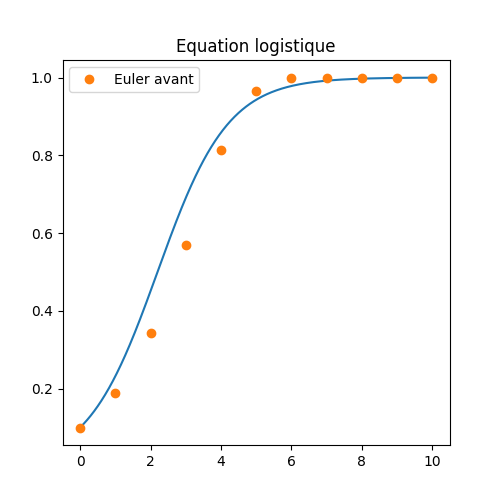

In [11]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.linspace(0,tmax,1000),alpha/(alpha+(1.-alpha)*np.exp(-lmb*np.linspace(0,tmax,1000))))
ax.plot(t,sol[0],'o',label=mode)
ax.legend()
_=ax.set_title('Equation logistique')
plt.show()

In [12]:
lmb=1
alpha=0.1
Nsim=6
N=10**(np.linspace(2,7,Nsim))
tmax=1
diff_EUav=np.zeros(Nsim)
diff_heun=np.zeros(Nsim)
diff_RK4=np.zeros(Nsim)
xexact=alpha/(alpha+(1.-alpha)*np.exp(-lmb*1.))
for j in range(Nsim):
    x_EUav,t=int_log(N[j],tmax,lmb,alpha,'Euler avant')
    x_heun,t=int_log(N[j],tmax,lmb,alpha,'Heun')
    x_RK4,t=int_log(N[j],tmax,lmb,alpha,'RK4')
    diff_EUav[j]=np.abs(xexact-x_EUav[-1])
    diff_heun[j]=np.abs(xexact-x_heun[-1])
    diff_RK4[j]=np.abs(xexact-x_RK4[-1])

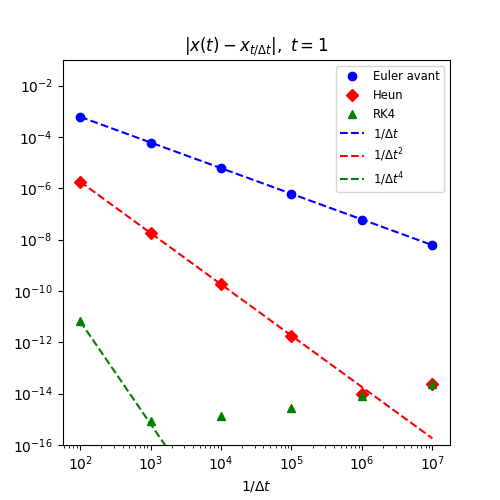

In [13]:
fig,ax=plt.subplots(figsize=(5,5))
plt.loglog(N,diff_EUav,'bo',label='Euler avant')
plt.loglog(N,diff_heun,'rD',label='Heun')
plt.loglog(N,diff_RK4,'g^',label='RK4')
plt.loglog(N,N**(-1)*(diff_EUav[0]/N[0]**(-1)),'b--',label='$1/\Delta t$')
plt.loglog(N,(N)**(-2)*(diff_heun[0]/N[0]**(-2)),'r--',label='$1/\Delta t^{2}$')
plt.loglog(N,N**(-4)*(diff_RK4[0]/N[0]**(-4)),'g--',label='$1/\Delta t^{4}$')
plt.title('$|x(t) - x_{t/\Delta t}|,\ t=1$')
plt.xlabel('$1/\Delta t$')
plt.legend(loc='best',fontsize='small')
plt.ylim((10**(-16),10**(-1)))
plt.show()

# Exercice 8: Oscillateur harmonique symplectique

In [14]:
#paramètres du problème
K=1.
m=1.0
#paramètre de l'intégration numérique
k=1
tmax=500
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)
#Conditions initiales
x0=[0,1]
#Solution analytique
omega=np.sqrt(K/m)
xsol=np.zeros((2,50000))
xsol[1,:]=x0[1]*np.cos(omega*np.linspace(0,tmax,50000))+x0[0]/(m*omega)*np.sin(omega*np.linspace(0,tmax,50000))
xsol[0,:]=(-x0[1]*omega*np.sin(omega*np.linspace(0,tmax,50000))+x0[0]/(m*omega)*omega*np.cos(omega*np.linspace(0,tmax,50000)))*m



x_Verl=HarmOsc(K,m,t,x0,'Verlet')
x_StVer=HarmOsc(K,m,t,x0,'Stormer_Verlet')
x_Heun=HarmOsc(K,m,t,x0,'Heun')
x_RK4=HarmOsc(K,m,t,x0,'RK4')
E_Verl=Energie_calc(x_Verl,K,m)
E_StVerl=Energie_calc(x_StVer,K,m)
E_RK4=Energie_calc(x_RK4,K,m)
E_Heun=Energie_calc(x_Heun,K,m)
Esol=Energie_calc(xsol,K,m)


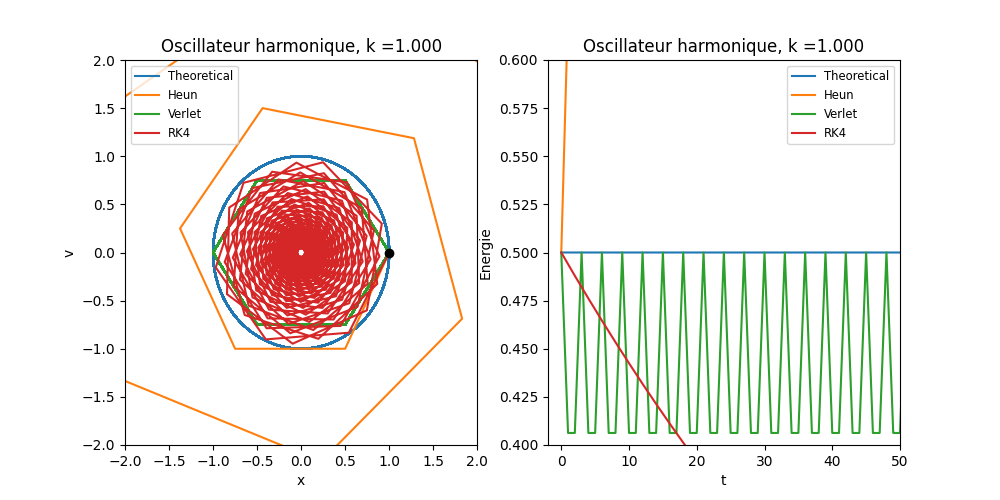

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(xsol[1,:],xsol[0,:]/m,label='Theoretical')
ax[0].plot(x_Heun[1,:],x_Heun[0,:]/m,label='Heun')
ax[0].plot(x_Verl[1,:],x_Verl[0,:]/m,label='Verlet')
ax[0].plot(x_RK4[1,:],x_RK4[0,:]/m,label='RK4')
ax[0].plot(x0[1],x0[0]/m,'ko')
ax[0].legend(loc='best',fontsize='small')
ax[0].set_xlabel('x')
ax[0].set_ylabel('v')
ax[0].set_title('Oscillateur harmonique, k =%.3f'%(k))
ax[0].set_xlim((-2,2))
ax[0].set_ylim((-2,2))
ax[1].plot(np.linspace(0,tmax,50000),Esol,label='Theoretical')
ax[1].plot(t,E_Heun,label='Heun')
ax[1].plot(t,E_Verl,label='Verlet')
ax[1].plot(t,E_RK4,label='RK4')
ax[1].legend(loc='best',fontsize='small')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Energie')
ax[1].set_title('Oscillateur harmonique, k =%.3f'%(k))
ax[1].set_ylim((0.4,0.6))
ax[1].set_xlim((-2,50))
plt.show()


